In [59]:
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
#from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca

In [60]:
# Get Data 
path2dat = "../plot_data/"
datalst = os.listdir(path2dat)

In [61]:
newdatalst = []
for address in datalst:
    if('Clas' in address):
        newdatalst.append(address)

In [62]:
newdatalst = sorted(newdatalst)

In [63]:
newdatalst

['Clas_bin1.dat',
 'Clas_bin2.dat',
 'Clas_bin3.dat',
 'Clas_bin4.dat',
 'Clas_bin5.dat',
 'Clas_bin6.dat',
 'Clas_bin7.dat',
 'Clas_bin8.dat',
 'Clas_bin9.dat']

In [64]:
df = []
for data in newdatalst:
    df.append(pd.read_csv(path2dat+data, delimiter = ',',delim_whitespace=True))

In [65]:
class clas_data:
    def __init__(self, file):
        #file = file[(file['pthigh']<0.40)]
        self.ptlow     = file['ptlow']
        self.pthigh    = file['pthigh']
        self.nulow     = file['nulow'][0]
        self.nuhigh    = file['nuhigh'][0]
        self.Q2low     = file['q2low'][0]
        self.Q2high    = file['q2high'][0]
        self.R_C       = file['C']
        self.R_C_err   = file['Cerr']
        self.R_Fe      = file['Fe']
        self.R_Fe_err  = file['FEerr']
        self.R_Pb      = file['Pb']
        self.R_Pb_err  = file['PBerr']
        self.DIS_C     = file['DIS_C']
        self.DIS_Fe    = file['DIS_FE']
        self.DIS_Pb    = file['DIS_PB']
        self.CX_D      = file['FUU_D']
        self.CX_C      = file['FUU_C']
        self.CX_FE     = file['FUU_FE']
        self.CX_PB     = file['FUU_PB']
        self.Ra_C      = file['FUU_C']/file['FUU_D']/file['DIS_C']
        self.Ra_Fe     = file['FUU_FE']/file['FUU_D']/file['DIS_FE']
        self.Ra_Pb     = file['FUU_PB']/file['FUU_D']/file['DIS_PB']
        

In [66]:
def plot_clas_data_xerr(data,axes):
    ptavg = []
    pterr_low = []
    pterr_high = []
    for i in range(len(data.ptlow)):
        ptavg.append(0.5*(data.ptlow[i]+data.pthigh[i]))
        pterr_low.append( np.abs(data.ptlow[i] - ptavg[i]) ) 
        pterr_high.append ( np.abs(data.pthigh[i] - ptavg[i]) )
    axes.plot(ptavg, data.Ra_D, color = "red")
    axes.plot(ptavg, data.Ra_Fe, color = "blue")
    axes.plot(ptavg, data.Ra_Pb, color = "black")
    axes.errorbar(ptavg, data.R_C,  xerr=[pterr_low,pterr_high], yerr= data.R_C_err, fmt = "o",color = "red", ecolor = "red", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm C")
    axes.errorbar(ptavg, data.R_Fe, xerr=[pterr_low,pterr_high], yerr= data.R_Fe_err, fmt = "o",color = "blue", ecolor = "blue", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm Fe")
    axes.errorbar(ptavg, data.R_Pb, xerr=[pterr_low,pterr_high], yerr= data.R_Pb_err, fmt = "o",color = "black", ecolor = "black", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm Pb")
    axes.tick_params(axis = 'both', direction ='in',labelsize = 20)
    
    
    props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
    nulow = str(data.nulow)
    nuhigh = str(data.nuhigh)
    Q2low = str(data.Q2low)
    Q2high = str(data.Q2high)
    nustr = r"\rm" + nulow + " $ < \\nu < $ " + nuhigh
    Q2str = r"\rm" + Q2low + " $ < Q^2 < $ " + Q2high
    axes.text(0.10, 0.9, nustr + " , " + "\n" + Q2str , transform=axes.transAxes, fontsize=20,
    verticalalignment='top', bbox=props)

In [67]:
def plot_clas_data_interp(data,axes):
    ptavg = []
    pterr_low = []
    pterr_high = []
    for i in range(len(data.ptlow)):
        ptavg.append(0.5*(data.ptlow[i]+data.pthigh[i]))
        pterr_low.append( np.abs(data.ptlow[i] - ptavg[i]) ) 
        pterr_high.append ( np.abs(data.pthigh[i] - ptavg[i]) )
    xmin = np.min(ptavg)
    xmax = np.max(ptavg)
    xnew = np.linspace(xmin, xmax, num=20, endpoint=True)     
    y_RAC = interp1d(ptavg, data.Ra_C, kind='cubic')
    y_RAFE = interp1d(ptavg, data.Ra_Fe, kind='cubic')
    y_RAPB = interp1d(ptavg, data.Ra_Pb, kind='cubic')
    axes.plot(xnew, y_RAC(xnew), color = "red")
    axes.plot(xnew, y_RAFE(xnew), color = "blue")
    axes.plot(xnew, y_RAPB(xnew), color = "black")
    axes.errorbar(ptavg, data.R_C,  yerr= data.R_C_err, fmt = "o",color = "red", ecolor = "red", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm C")
    axes.errorbar(ptavg, data.R_Fe, yerr= data.R_Fe_err, fmt = "o",color = "blue", ecolor = "blue", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm Fe")
    axes.errorbar(ptavg, data.R_Pb, yerr= data.R_Pb_err, fmt = "o",color = "black", ecolor = "black", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm Pb")
    axes.tick_params(axis = 'both', direction ='in',labelsize = 30)
    #axes.set_xlim(0,0.30)
    #axes.set_ylim(0.2,1.2)
    
    props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
    nulow = str(data.nulow)
    nuhigh = str(data.nuhigh)
    Q2low = str(data.Q2low)
    Q2high = str(data.Q2high)
    nustr = r"\rm" + nulow + " $ < \\nu < $ " + nuhigh
    Q2str = r"\rm" + Q2low + " $ < Q^2 < $ " + Q2high
    axes.text(0.10, 0.9, nustr + " , " + "\n" + Q2str , transform=axes.transAxes, fontsize=20,
    verticalalignment='top', bbox=props)
        



In [68]:
def plot_clas_data(data,axes):
    ptavg = []
    pterr_low = []
    pterr_high = []
    for i in range(len(data.ptlow)):
        ptavg.append(0.5*(data.ptlow[i]+data.pthigh[i]))
        pterr_low.append( np.abs(data.ptlow[i] - ptavg[i]) ) 
        pterr_high.append ( np.abs(data.pthigh[i] - ptavg[i]) )
    xmin = np.min(ptavg)
    xmax = np.max(ptavg)
    xnew = np.linspace(xmin, xmax, num=100, endpoint=True)     
    axes.plot(ptavg, data.Ra_C, color = "red",label = r"\rm C")
    axes.plot(ptavg, data.Ra_Fe, color = "blue",label = r"\rm Fe")
    axes.plot(ptavg, data.Ra_Pb, color = "black",label = r"\rm Pb")
    axes.errorbar(ptavg, data.R_C,  yerr= data.R_C_err, fmt = "o",color = "red", ecolor = "red", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm C")
    axes.errorbar(ptavg, data.R_Fe, yerr= data.R_Fe_err, fmt = "o",color = "blue", ecolor = "blue", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm Fe")
    axes.errorbar(ptavg, data.R_Pb, yerr= data.R_Pb_err, fmt = "o",color = "black", ecolor = "black", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm Pb")
    axes.tick_params(axis = 'both', direction ='in',labelsize = 30)
    #axes.set_xlim(0,0.30)
    #axes.set_ylim(0.2,1.2)
    
    props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
    nulow = str(data.nulow)
    nuhigh = str(data.nuhigh)
    Q2low = str(data.Q2low)
    Q2high = str(data.Q2high)
    nustr = r"\rm" + nulow + " $ < \\nu < $ " + nuhigh
    Q2str = r"\rm" + Q2low + " $ < Q^2 < $ " + Q2high
    axes.text(0.10, 0.9, nustr + " , " + "\n" + Q2str , transform=axes.transAxes, fontsize=20,
    verticalalignment='top', bbox=props)
        



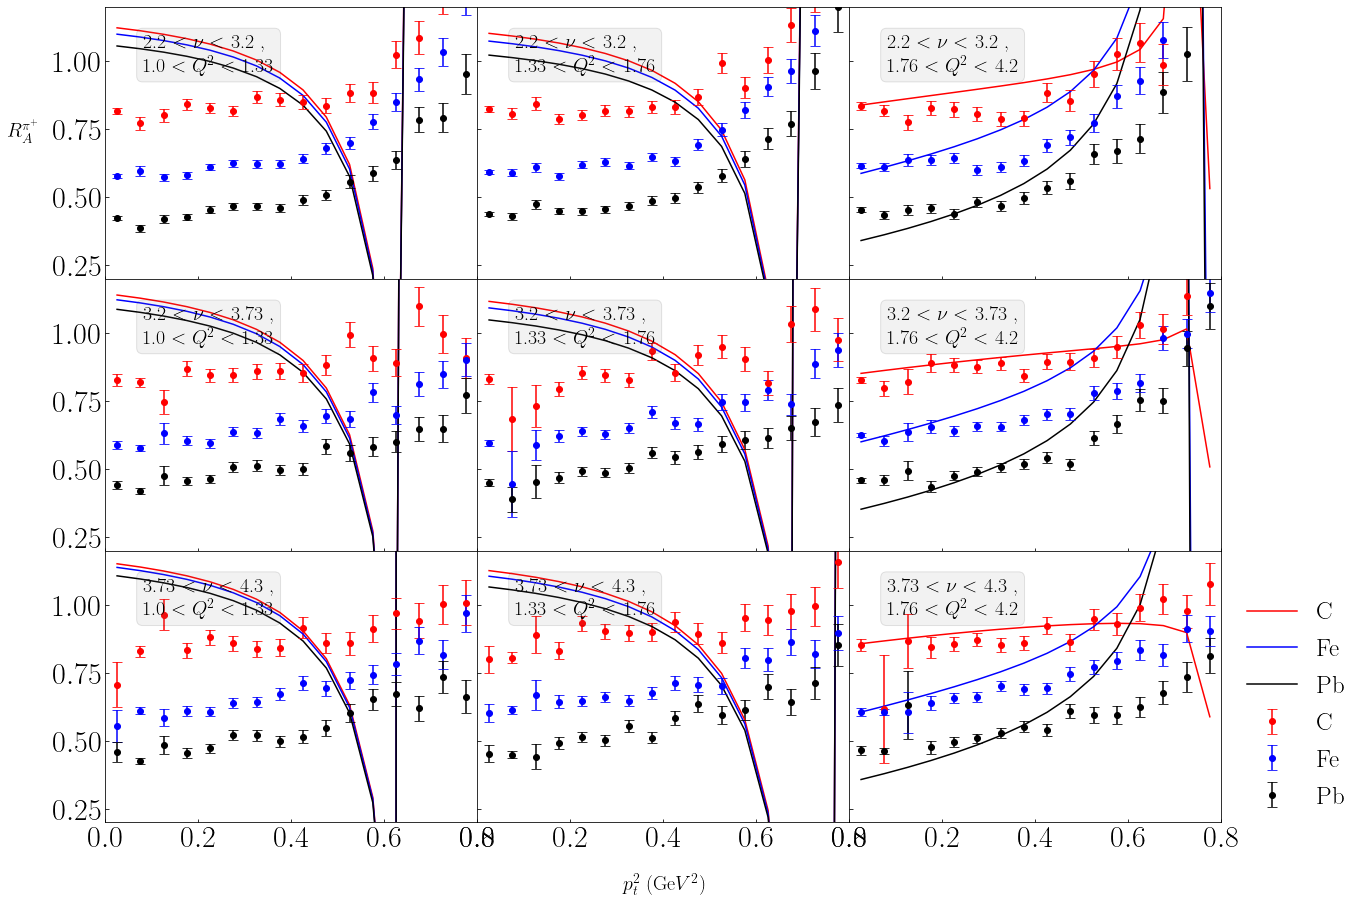

In [69]:
fig, axs = plt.subplots(3, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

plot_clas_data(clas_data(df[0]),axs[0,0])
plot_clas_data(clas_data(df[1]),axs[0,1])
plot_clas_data(clas_data(df[2]),axs[0,2])
plot_clas_data(clas_data(df[3]),axs[1,0])
plot_clas_data(clas_data(df[4]),axs[1,1])
plot_clas_data(clas_data(df[5]),axs[1,2])
plot_clas_data(clas_data(df[6]),axs[2,0])
plot_clas_data(clas_data(df[7]),axs[2,1])
plot_clas_data(clas_data(df[8]),axs[2,2])

axs[0,0].set_ylabel(r"\rm $R^{\pi^+}_A$", fontsize = 20,rotation = 0,labelpad = 30)
axs[2,1].set_xlabel(r"\rm $p_t^2 $ (Ge$V^2$)", fontsize = 20,rotation = 0,labelpad = 20)

axs[2,2].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))


axs[0,0].set_xlim(0,0.80)
axs[0,1].set_xlim(0,0.80)
axs[0,2].set_xlim(0,0.80)

axs[0,0].set_ylim(0.2,1.2)
axs[1,0].set_ylim(0.2,1.2)
axs[2,0].set_ylim(0.2,1.2)



fig.set_size_inches(20,15)


In [38]:
fig.savefig('CLAS_12.pdf', bbox_inches = "tight")

(0.0, 0.8)

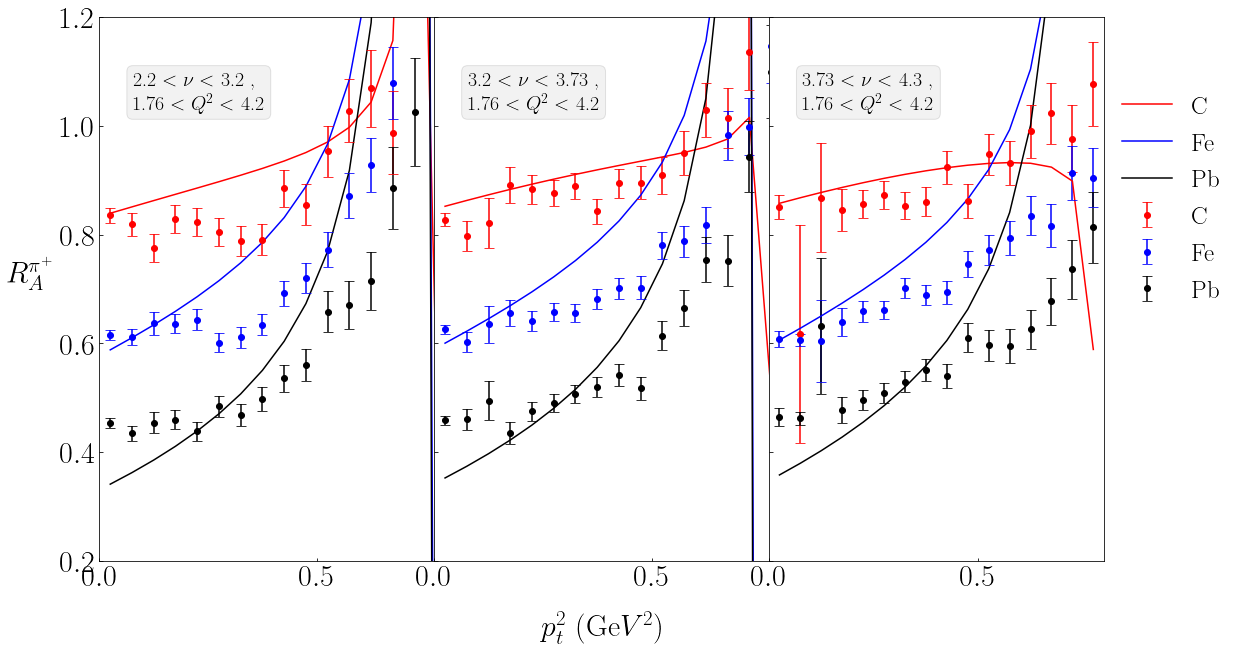

In [70]:
fig2, axs2 = plt.subplots(1, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

#plot_clas_data(clas_data(df[0]),axs2[0])
#plot_clas_data(clas_data(df[1]),axs2[0,1])
plot_clas_data(clas_data(df[2]),axs2[0])
#plot_clas_data(clas_data(df[3]),axs2[1,0])
#plot_clas_data(clas_data(df[4]),axs2[1,1])
plot_clas_data(clas_data(df[5]),axs2[1])
#plot_clas_data(clas_data(df[6]),axs2[2,0])
#plot_clas_data(clas_data(df[7]),axs2[2,1])
plot_clas_data(clas_data(df[8]),axs2[2])

axs2[0].set_ylabel(r"\rm $R^{\pi^+}_A$", fontsize = 30,rotation = 0,labelpad = 30)
axs2[1].set_xlabel(r"\rm $p_t^2 $ (Ge$V^2$)", fontsize = 30,rotation = 0,labelpad = 20)

axs2[2].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))

axs2[0].set_ylim(0.2,1.2)

fig2.set_size_inches(18,10)
# In[12]:

axs2[0].set_xlim(0,0.77)
axs2[1].set_xlim(0,0.77)
axs2[2].set_xlim(0,0.8)



In [71]:
fig2.savefig('CLAS_RATIOS.pdf', bbox_inches = "tight")